# Data Description

A set of four Fuel cells (# 5, 6, 7 and 18) were run through 2 different operational profiles
(charge& discharge) at room temperature. Charging was carried out in a constant current (CC)
mode at 1.5A until the Fuel cell voltage reached 4.2V and then continued in a constant voltage
(CV) mode until the charge current dropped to 20mA. Discharge was carried out at a constant
current (CC) level of 2A until the battery voltage fell to 2.7V, 2.5V, 2.2V and 2.5V for Fuel cell 5 6 7
and 18 respectively. 
Repeated charge and discharge cycles result in accelerated aging of the Fuel cell. The
experiments were stopped when the Fuel cell reached end-of-life (EOL) criteria, which was a 30%
fade in rated capacity (from 2Ahr to 1.4Ahr).
This data can be further used for the prediction of both remaining charge (for a given discharge
cycle) and remaining useful life (RUL).
Files: 
1. B0005.mat Data for Fuel cell #5
2. B0006.mat Data for Fuel cell #6
3. B0007.mat Data for Fuel cell #7
4. B0018.mat Data for Fuel cell #18

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
from scipy.io import loadmat
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Reading the data

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hydrogen-fuel-cell-anomoly-detection/B0006.mat
/kaggle/input/hydrogen-fuel-cell-anomoly-detection/B0005.mat
/kaggle/input/hydrogen-fuel-cell-anomoly-detection/README.txt
/kaggle/input/hydrogen-fuel-cell-anomoly-detection/B0007.mat
/kaggle/input/hydrogen-fuel-cell-anomoly-detection/B0018.mat


# Converting the matlab files to csv for easily working in python

## Data Dictionary

- ambient_temperature: ambient temperature (degree C)
- datetime: the date and time of the start of the cycle, in MATLAB date vector format
- data: data structure containing the measurements
- Voltage_measured: Fuel cell terminal voltage (Volts)
- Current_measured: Fuel cell output current (Amps)
- Temperature_measured: Fuel cell temperature (degree C)
- Current_charge: Current measured at load (Amps)
- Voltage_charge: Voltage measured at load (Volts)
- Time: Time vector for the cycle (secs)
- Capacity: Fuel cell capacity (Ahr) for discharge till 2.7V

In [3]:
def load_data(nm,battery): # Example of input load_data('B0006.mat','B0006')
    mat=loadmat(nm)
    #print("Total data in dataset : ",len(mat[battery][0,0]['cycle'][0]))
    counter=0
    dataset=[]
    capacity_data=[]
    
    for i in range(len(mat[battery][0,0]['cycle'][0])):
        row=mat[battery][0,0]['cycle'][0,i]
        if row['type'][0] == 'discharge':
            ambient_temperature=row['ambient_temperature'][0][0]
            date_time=datetime.datetime(int(row['time'][0][0]),
                                        int(row['time'][0][1]),
                                        int(row['time'][0][2]),
                                        int(row['time'][0][3]),
                                        int(row['time'][0][4])) 
            + datetime.timedelta(seconds=int(row['time'][0][5]))
            
            data=row['data']
            capacity=data[0][0]['Capacity'][0][0]
            for j in range(len(data[0][0]['Voltage_measured'][0])):
                voltage_measured=data[0][0]['Voltage_measured'][0][j]
                current_measured=data[0][0]['Current_measured'][0][j]
                temperature_measured=data[0][0]['Temperature_measured'][0][j]
                current_load=data[0][0]['Current_load'][0][j]
                voltage_load=data[0][0]['Voltage_load'][0][j]
                time=data[0][0]['Time'][0][j]
                dataset.append([counter + 1, ambient_temperature, date_time, 
                                capacity, voltage_measured, current_measured, 
                                temperature_measured, current_load, 
                                voltage_load, time])
            
            capacity_data.append([counter + 1, ambient_temperature, date_time,
                                 capacity])
            counter=counter+1
    print(dataset[0])
    return [pd.DataFrame(data=dataset,columns=['cycle','ambient_temperature',
                                                  'datetime','capacity',
                                                   'voltage_measured',
                                                  'current_measured',
                                                   'temperature_measured',
                                                  'current_load','voltage_load',
                                                   'time']),
            pd.DataFrame(data=capacity_data,columns=['cycle','ambient_temperature',
                                                  'datetime','capacity'])]
                

#### There are four different files for three difrent fuel cell, storing the sensor reading for each, so we read all of them one by one

In [4]:
dataset1,capacity1=load_data('/kaggle/input/hydrogen-fuel-cell-anomoly-detection/B0005.mat','B0005')
dataset1['flag']=1

[1, 24, datetime.datetime(2008, 4, 2, 15, 25), 1.8564874208181574, 4.191491807505295, -0.004901589207462691, 24.330033885570543, -0.0006, 0.0, 0.0]


In [5]:
dataset2,capacity2=load_data('/kaggle/input/hydrogen-fuel-cell-anomoly-detection/B0006.mat','B0006')
dataset2['flag']=2

[1, 24, datetime.datetime(2008, 4, 2, 15, 25), 2.035337591005598, 4.179799607333447, -0.0023663271409738672, 24.277567510331888, -0.0006, 0.0, 0.0]


In [6]:
dataset3, capacity3 = load_data('/kaggle/input/hydrogen-fuel-cell-anomoly-detection/B0007.mat','B0007')
dataset3['flag']=3

[1, 24, datetime.datetime(2008, 4, 2, 15, 25), 1.89105229539079, 4.199359521791473, -0.0018658918833680202, 23.93704394613529, -0.0004, 0.0, 0.0]


In [7]:
dataset4, capacity4 = load_data('/kaggle/input/hydrogen-fuel-cell-anomoly-detection/B0018.mat','B0018')
dataset4['flag']=4

[1, 24, datetime.datetime(2008, 7, 7, 15, 15), 1.8550045207910817, 4.188108651124536, 0.00013066734156636677, 23.8195202516044, 0.0006, 0.0, 0.0]


# Joining the Datasets

In [8]:
df=pd.concat([dataset1,dataset2,dataset3,dataset4],ignore_index=True)

In [9]:
df.tail()

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,flag
185716,132,24,2008-08-20 08:37:00,1.341051,3.443760,-0.002426,35.383979,0.0006,0.0,2686.359,4
185717,132,24,2008-08-20 08:37:00,1.341051,3.453271,-0.000981,35.179732,0.0006,0.0,2700.546,4
185718,132,24,2008-08-20 08:37:00,1.341051,3.461963,0.000209,34.977000,0.0006,0.0,2714.640,4
185719,132,24,2008-08-20 08:37:00,1.341051,3.469907,0.001516,34.785943,0.0006,0.0,2728.750,4
185720,132,24,2008-08-20 08:37:00,1.341051,3.477277,-0.001940,34.581660,0.0006,0.0,2742.843,4


# Doing Analysis on fuel cell data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185721 entries, 0 to 185720
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   cycle                 185721 non-null  int64         
 1   ambient_temperature   185721 non-null  uint8         
 2   datetime              185721 non-null  datetime64[ns]
 3   capacity              185721 non-null  float64       
 4   voltage_measured      185721 non-null  float64       
 5   current_measured      185721 non-null  float64       
 6   temperature_measured  185721 non-null  float64       
 7   current_load          185721 non-null  float64       
 8   voltage_load          185721 non-null  float64       
 9   time                  185721 non-null  float64       
 10  flag                  185721 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(2), uint8(1)
memory usage: 14.3 MB


In [11]:
for i in df.columns:
    print(i,':',df[i].nunique())

cycle : 168
ambient_temperature : 1
datetime : 300
capacity : 636
voltage_measured : 185721
current_measured : 185721
temperature_measured : 185721
current_load : 21
voltage_load : 1835
time : 62016
flag : 4


## Plotting various features

### 1. Cycle vs Capacity

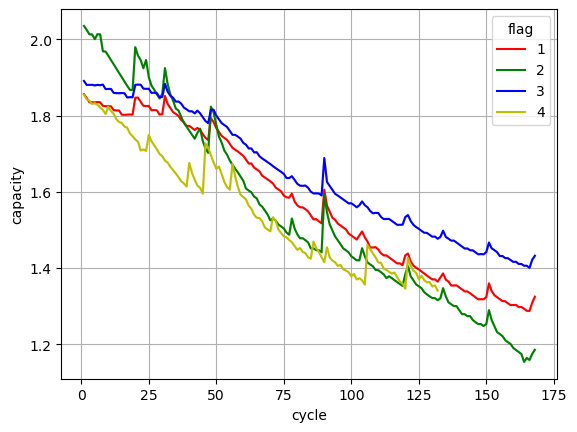

In [12]:
sns.lineplot(x='cycle',y='capacity',data=df,palette=['r','g','b','y'], hue='flag')
plt.grid()

### 2. Datetime(when we started the charging of the cycle) vs time (time taken to complete one cycle)

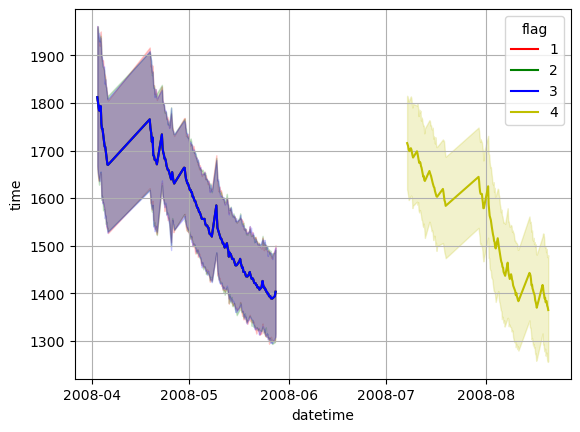

In [13]:
# entire dataset is in long-form mode will aggregate over repeatedd values to show the mean and
# aggregation is happening at date level (datetime --> date) and time is also continuous
sns.lineplot(x='datetime',y='time',data=df,palette=['r','g','b','y'], hue='flag')
plt.grid()

### 3. Datetime vs Capacity of fuel cell

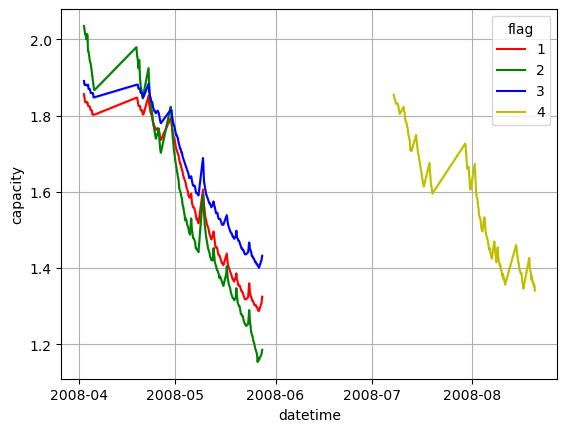

In [14]:
sns.lineplot(x='datetime',y='capacity',data=df,palette=['r','g','b','y'],hue='flag')
plt.grid()

### 4. Time vs Capacity

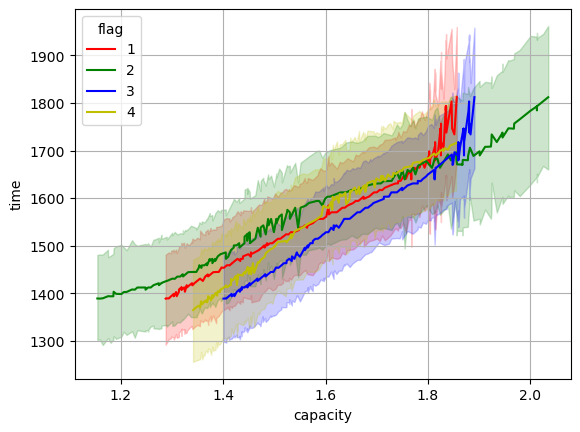

In [15]:
sns.lineplot(y='time',x='capacity',data=df,palette=['r','g','b','y'],hue='flag')
plt.grid()

### 5. Fuel cell temperature vs time

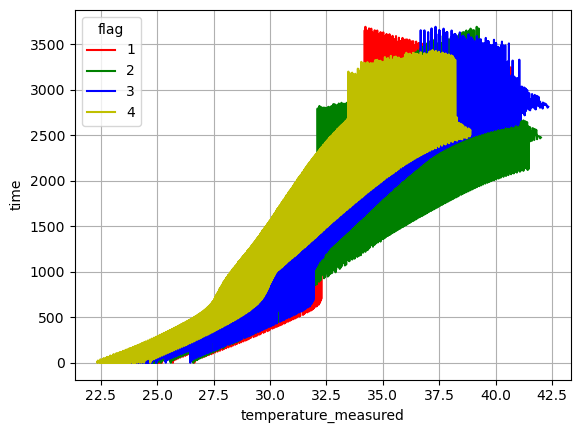

In [16]:
sns.lineplot(x='temperature_measured',y='time',data=df,palette=['r','g','b','y'],hue='flag')
plt.grid()

### Insights from Above Charts

1. Time taken to complete each cycle decreases
2. Capacity decreases with number of cycles baterry is used
3. Capacity decreases over time
4. Temperature increases while the batery cycle completes everytime
5. Capacity increase when time to charge increases

**Removing columns ambient temp.**


Ambient temp is same throughout

In [17]:
df=df.drop(['ambient_temperature'],axis=1)

#### Datetime column is in pd.datetime64[ns] format, changing it to int

In [18]:
df['datetime'].head()

0   2008-04-02 15:25:00
1   2008-04-02 15:25:00
2   2008-04-02 15:25:00
3   2008-04-02 15:25:00
4   2008-04-02 15:25:00
Name: datetime, dtype: datetime64[ns]

In [19]:
df['datetime']=df['datetime'].astype('int64')

In [20]:
df['datetime'].head()

0    1207149900000000000
1    1207149900000000000
2    1207149900000000000
3    1207149900000000000
4    1207149900000000000
Name: datetime, dtype: int64

**Finding correlation between columns using pearson correlation, the result with spearman correlation is also the same**

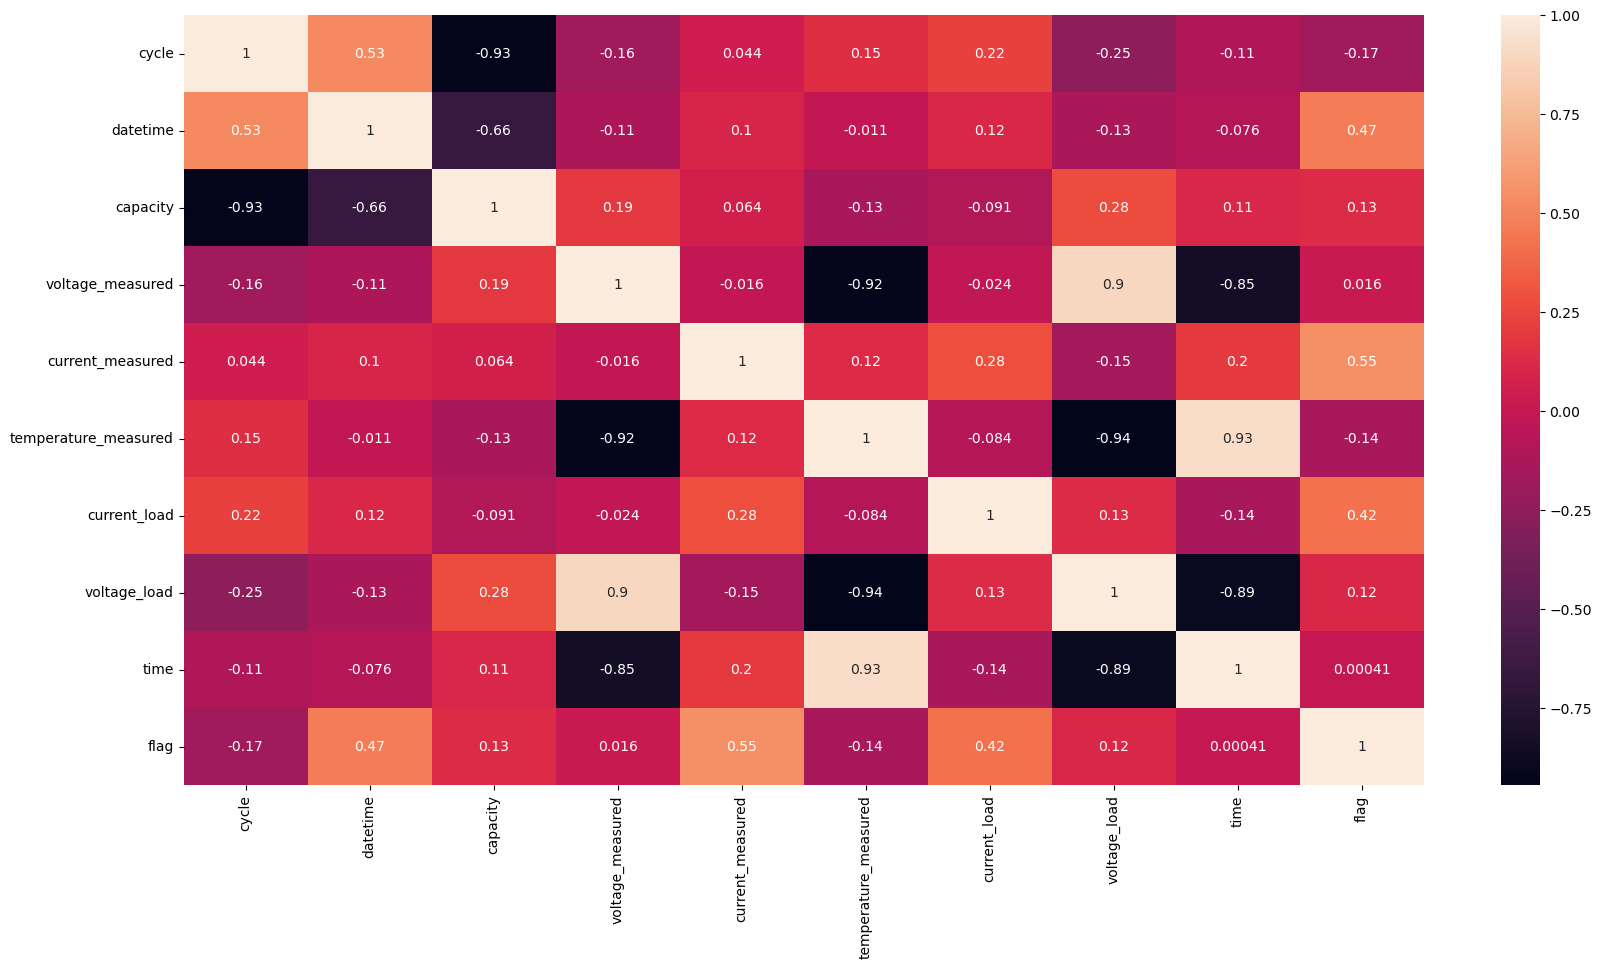

In [21]:
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(method='spearman'), annot=True)
plt.show()

### Dropping the duplicates and null values


**None in our case**

### Doing outlier detection with percentile range

In [22]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

cycle                   7.500000e+01
datetime                1.995000e+15
capacity                3.158249e-01
voltage_measured        2.780981e-01
current_measured        2.144362e-02
temperature_measured    5.850056e+00
current_load            8.000000e-04
voltage_load            3.080000e-01
time                    1.542688e+03
flag                    2.000000e+00
dtype: float64


### Boxplot to visualize IQR

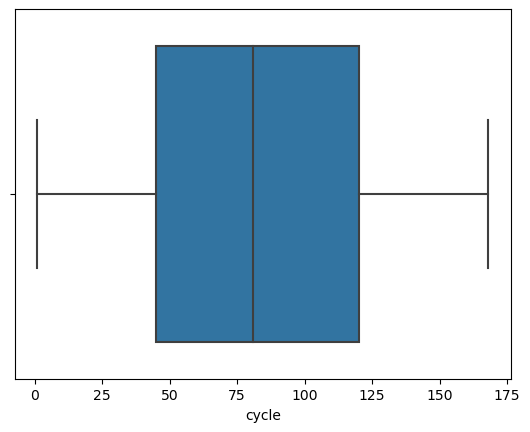

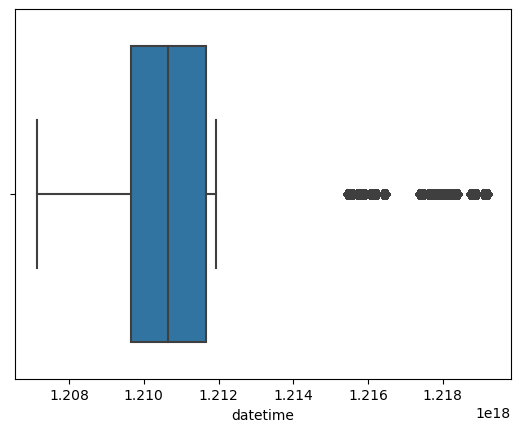

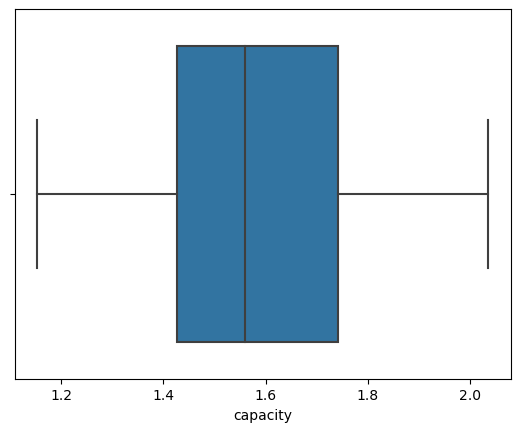

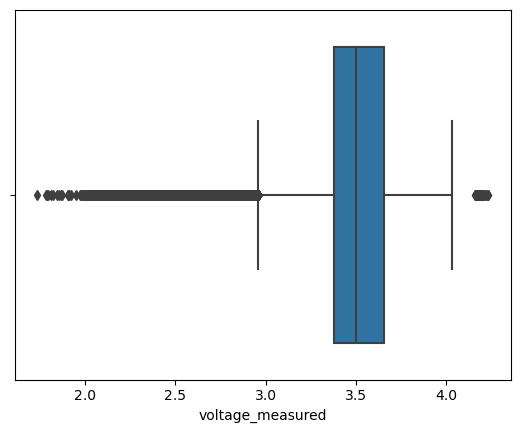

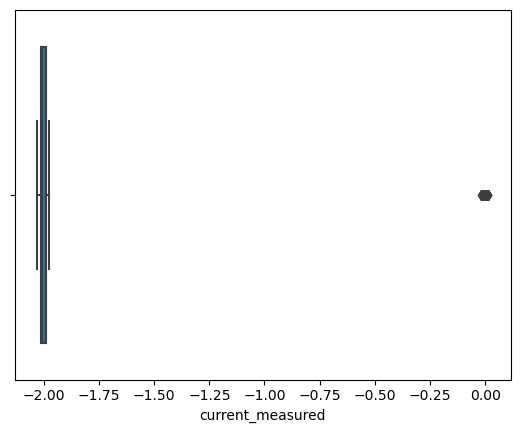

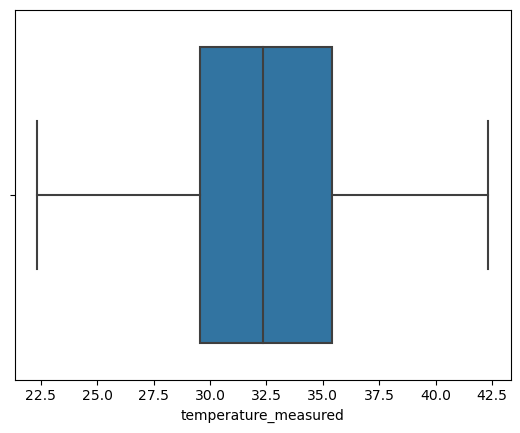

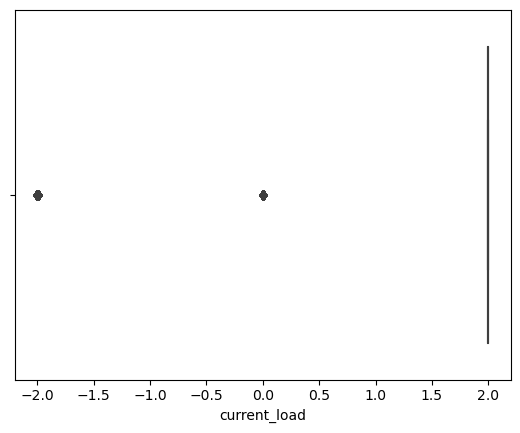

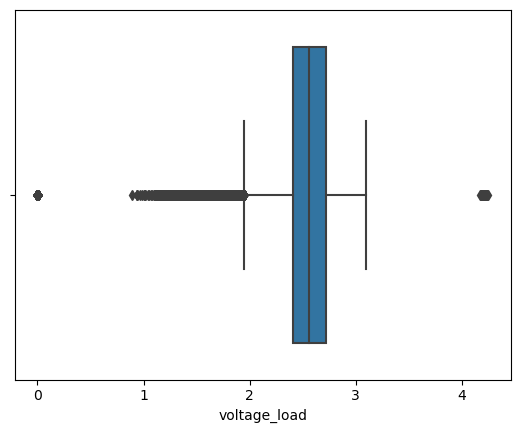

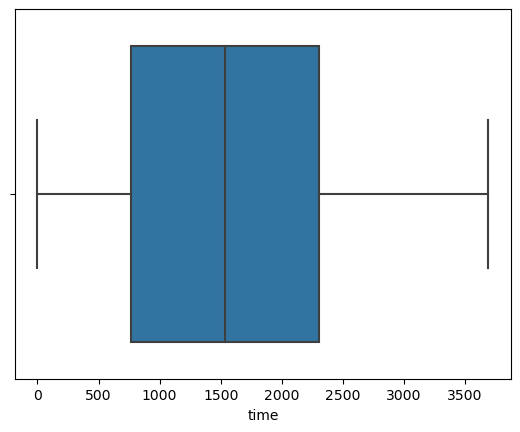

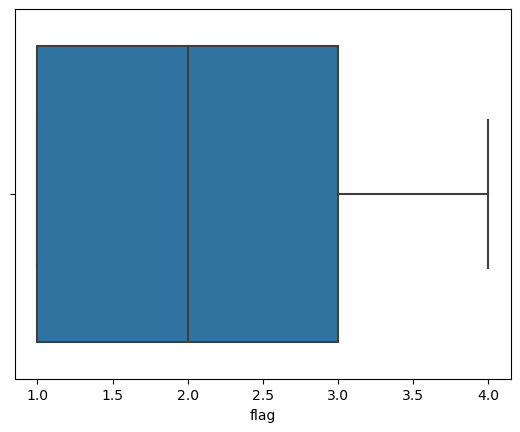

In [23]:
for i in df.columns:
    sns.boxplot(x=i,data=df)
    plt.show()

In [24]:
#inner quartile
df_out=df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]
print(df_out.shape)

(68810, 10)


In [25]:
#outer quartile
df_out2=df[((df<(Q1-3*IQR)) | (df>(Q3+3*IQR))).any(axis=1)]
print(df_out2.shape)

(48586, 10)


In [26]:
# making copies of ds for experimentation purpose
df_copy=df.copy(deep=True)
df_copy.head()

,cycle,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,flag
0,1,1207149900000000000,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1
1,1,1207149900000000000,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1
2,1,1207149900000000000,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1
3,1,1207149900000000000,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1
4,1,1207149900000000000,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1


### Min Max Scalling of the data

In [27]:
df.columns

Index(['cycle', 'datetime', 'capacity', 'voltage_measured', 'current_measured',
       'temperature_measured', 'current_load', 'voltage_load', 'time', 'flag'],
      dtype='object')

In [28]:
cols=['cycle', 'datetime', 'capacity', 'voltage_measured', 'current_measured',
       'temperature_measured', 'current_load', 'voltage_load']

from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

df[cols]=ms.fit_transform(df[cols])
df.head()

,cycle,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,flag
0,0.0,0.0,0.797111,0.983242,0.990600,0.099077,0.49985,0.000000,0.000,1
1,0.0,0.0,0.797111,0.982944,0.992276,0.098875,0.49985,0.989880,16.781,1
2,0.0,0.0,0.797111,0.896465,0.008109,0.102032,0.00045,0.720640,35.703,1
3,0.0,0.0,0.797111,0.887189,0.007399,0.109822,0.00045,0.713109,53.781,1
4,0.0,0.0,0.797111,0.880233,0.008787,0.119162,0.00045,0.708637,71.922,1
